In [1]:
# coding: utf-8

# In[1]:

import numpy as np
#import h5py
#import tensorflow as tf
#import matplotlib.pyplot as plt
import tensorflow as tf
import h5py
#from scipy import signal
from tensorflow.python.keras.layers import Input,Conv2D,Concatenate,Flatten,Dense,LeakyReLU,Dropout, ReLU,Softmax
from tensorflow.python.keras.callbacks import TensorBoard,ModelCheckpoint
from tensorflow.python.keras.models import Model

from tensorflow.python.keras.losses import categorical_crossentropy
from tensorflow.python.keras import backend as K

from tensorflow.python.keras.activations import relu
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
fn = 2
d_min = 1
d_max = 10
blur_filter_size = 11
blur_range = 10
image_size = 512
epochs = 100
batch_size = 28

In [3]:
train_data_path = 'vcm_data/train_data_one_im_norm_2set_512_vcm_discrinimator.npy'
#test_data_path = 'test_data.npy'
train_label_path = 'vcm_data/train_label_one_im_norm_2set_512_vcm_discrinimator.npy'
#test_label_path = 'test_label.npy'

In [4]:
data = np.load(train_data_path)

# model.save_weights('my_dis_weights_512.h5')
#test_data = np.load(test_data_path)
label = np.load(train_label_path)

In [5]:
print(data.shape)
print(label.shape)

(20000, 512, 512, 1)
(20000, 3)


In [6]:
train_data = data[:10000, :, :, :]
train_label = label[:10000, :]


[475. 700.   0.]


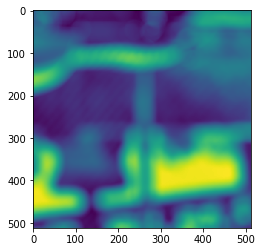

In [7]:
#to_categorical(train_label[:, 2]).shape
idx = 7
plt.imshow(train_data[idx, :, :, 0])

print(train_label[idx, :])

In [8]:
# In[7]:
input_image1 = Input(shape=(512,512,1), name = "input")
#layer1_1 = Conv2D(4, (8, 8), 8,padding='valid',activation=None,use_bias=False,kernel_initializer = my_init,trainable=True,name='layer1')(input_image1)
layer1_1 = Conv2D(4, (8, 8), 4,padding='same',activation=relu, name="Conv1_1")(input_image1)

layer2_1 = Conv2D(8, (8, 8), 2,padding='same',activation=relu, name="Conv2_1")(layer1_1)

layer3_1 = Conv2D(32, (3, 3), 2,padding='same',activation=relu, name="Conv3_1")(layer2_1)

layer4_1 = Conv2D(32, (3, 3), 2,padding='same',activation=relu, name="Conv4_1")(layer3_1)

flattened = Flatten(name="flat")(layer4_1)
Dp1 = Dropout(0.5)(flattened)
dense1 = Dense(10, name="d1")(Dp1)
#ReLU1 = ReLU(name="lr1")(dense1)

output_position = Dense(2, activation='softmax', name="out")(dense1)

print(output_position)

model = Model(inputs=input_image1, outputs=output_position)
model.summary()


print(model.output_shape)

Tensor("out/Softmax:0", shape=(?, 2), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 512, 512, 1)       0         
_________________________________________________________________
Conv1_1 (Conv2D)             (None, 128, 128, 4)       260       
_________________________________________________________________
Conv2_1 (Conv2D)             (None, 64, 64, 8)         2056      
_________________________________________________________________
Conv3_1 (Conv2D)             (None, 32, 32, 32)        2336      
_________________________________________________________________
Conv4_1 (Conv2D)             (None, 16, 16, 32)        9248      
_________________________________________________________________
flat (Flatten)               (None, 8192)              0         
_________________________________________________________________
dropout (Dropout)      

In [14]:
opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt)

model.fit(train_data, to_categorical(train_label[:, 2:]), epochs = 10,batch_size = batch_size,validation_split=0.2, verbose=1)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 8s 981us/step - loss: 0.5063 - val_loss: 0.3629
Epoch 2/10
8000/8000 [==============================] - 7s 934us/step - loss: 0.1993 - val_loss: 0.1349
Epoch 3/10
8000/8000 [==============================] - 8s 949us/step - loss: 0.1200 - val_loss: 0.1538
Epoch 4/10
8000/8000 [==============================] - 8s 950us/step - loss: 0.1117 - val_loss: 0.2241
Epoch 5/10
8000/8000 [==============================] - 8s 956us/step - loss: 0.0997 - val_loss: 0.1154
Epoch 6/10
8000/8000 [==============================] - 8s 938us/step - loss: 0.0775 - val_loss: 0.1475
Epoch 7/10
8000/8000 [==============================] - 8s 949us/step - loss: 0.0726 - val_loss: 0.1114
Epoch 8/10
8000/8000 [==============================] - 8s 955us/step - loss: 0.0573 - val_loss: 0.1556
Epoch 9/10
8000/8000 [==============================] - 8s 964us/step - loss: 0.1119 - val_loss: 0.1368
Epoch 10/10
8000

In [38]:
model.save('my_model_dis_512.h5')

model.save_weights('my_dis_weights_512.h5')
# model.load_weights('my_dis_weights_512.h5')

In [11]:
# print(to_categorical(train_label[:10, 2:]))

In [34]:
pred  = model.predict(train_data[:, :, :, :50])

[675. 725.   0.]
[0.7766708  0.22332917]


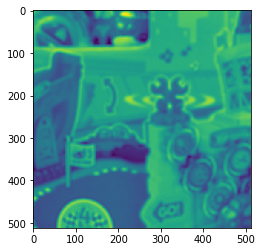

In [37]:
idx = 25
plt.imshow(train_data[idx, :, :, 0])

print(train_label[idx, :])
print(pred[idx, :])